# url: https://pythonandai.com/scikit-learn-unsupervised-learning/

# 教師なし学習の実装：Scikit-learnを使った主成分分析（PCA）、K-Meansクラスタリング、t-SNE

## 主成分分析（PCA）を用いた次元削減
主成分分析（PCA）は、高次元のデータを低次元に変換するための手法で、データの特徴を保ったまま次元削減を行うことができます。Scikit-learnのdecompositionモジュールからPCAを利用します。

PCAのインスタンス作成後、fit_transformメソッドを使って元のデータを次元削減します。

具体的な使用例として、アイリスのデータセットを用いてPCAによる次元削減の例を示します。

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# データのロード
iris = load_iris()
X = iris.data
y = iris.target

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print(X_pca.shape)

(150, 2)


このように、4次元だったアイリスのデータセットが、2次元に削減されました。

## K-Meansクラスタリング
K-Meansは、非階層型クラスタリングの一つで、データをk個のクラスタに分ける手法です。Scikit-learnでこの手法を使用するには、sklearn.clusterの中からKMeansというモジュールをインポートします。

KMeansのインスタンスを作成する際の基本的な引数は以下の通りです。次に、KMeansのfit_predictメソッドを使って、元のデータをクラスタリングします。

具体的な使用例として、前述のアイリスのデータセットを用いてK-Meansクラスタリングを行ってみます。



In [2]:
from sklearn.cluster import KMeans

# KMeansインスタンスの作成
kmeans = KMeans(n_clusters=3)  # アイリスデータセットは3種類の花があるため、クラスタ数は3に設定

# クラスタリング
kmeans_labels = kmeans.fit_predict(X)

display(kmeans_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

上記のように0、1、2の3つのクラスに分類されたことがわかります。

## エルボー法を使ったクラスタ数の推定
K-Meansクラスタリングでは、クラスタ数を事前に設定する必要がありますが、実際の問題では最適なクラスタ数が分からないことが多いです。そのような場合、エルボー法という手法を使って適切なクラスタ数を推定することができます。

エルボー法では、クラスタ数を増やしていくとともに各クラスタ内の二乗誤差（WCSS：Within-Cluster Sum of Square）を計算し、その結果をプロットします。WCSSはKMeansのinertia_属性を使って取得することができます。

適切なクラスタ数は、プロットを見て「傾き(エルボー=肘)」ができる点とします。つまり、クラスタ数を増やしてもWCSSの減少が顕著でなくなる点を選びます。

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

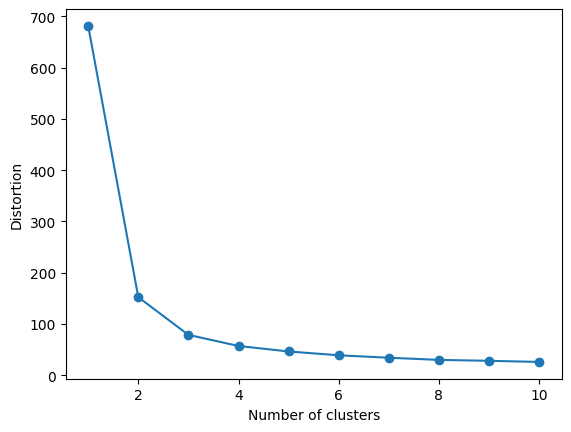

In [3]:
import matplotlib.pyplot as plt

# エルボー法によるクラスタ数の推定
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

# エルボー図の作成
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

このプロットから、クラスタ数が2あるいは3のときに「肘」ができていることが確認できます。したがって、アイリスのデータセットに対する適切なクラスタ数は2か3と判断できます。

## t-SNEを用いた次元圧縮
t-SNEは、高次元データを低次元（通常は2次元または3次元）にマッピングするための手法で、特に視覚化に有用です。Scikit-learnのmanifoldモジュールからTSNEを利用します。

TSNEのインスタンスを作成し、fit_transformメソッドを使って元のデータを次元削減します。

具体的な使用例として、前述のアイリスデータセットを用いてt-SNEによる次元圧縮を行ってみます。



Reduced shape:  (150, 2)


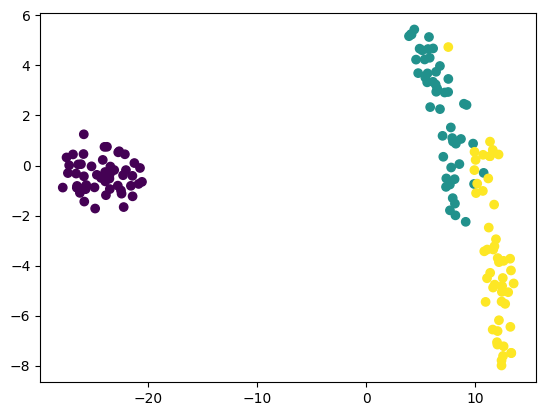

In [4]:
from sklearn.manifold import TSNE

# t-SNEインスタンスの作成
tsne = TSNE(n_components=2,random_state=0)  # 圧縮後の次元数を2に設定

# 次元圧縮
X_tsne = tsne.fit_transform(X)  # 2次元データに変換

print("Reduced shape: ", X_tsne.shape)  # 圧縮後のデータの次元数を表示

# プロット
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.show()

4次元データが2次元に圧縮され、また図のように高次元データを視覚化することが可能になります。

以上が、Scikit-learnを使った主成分分析（PCA）、K-Meansクラスタリング、t-SNEの基本的な使い方です。教師なし学習は、ラベルがないデータに対する探索的な分析や、高次元データの次元削減、データのクラスタリングなど、さまざまな場面で利用することができます。

と言いつつ、個人的にはあまり有効活用できていないので、これを機にどのような場面で使えるかを考えながら積極的に使っていきたいと思います。